# 데이터 출처

# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [5]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin_nan', 'low_glu_insulin']]
X.shape

(768, 9)

In [6]:
y = df["Outcome"]
y.shape

(768,)

In [7]:
# 사이킷런에서 제공하는 model_selection 의 train_test_split으로 만듭니다.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
# train 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_train.shape, y_train.shape

((614, 9), (614,))

In [16]:
# test 세트의 문제와 정답의 데이터 수를 확인해 주세요.

X_test.shape, y_test.shape

((154, 9), (154,))

# 머신러닝 알고리즘 사용하기

## Single Tree

In [10]:
# from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state = 42)
# model

DecisionTreeClassifier(random_state=42)

## Bagging

In [18]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(random_state = 42)
# model

RandomForestClassifier(random_state=42)

## Boosting

In [44]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state = 42)
model

GradientBoostingClassifier(random_state=42)

# 학습과 예측하기

In [45]:
# 학습을 시킵니다.

model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [46]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.48098777e-02, 1.56708089e-04, 6.62189591e-01,
       0.00000000e+00])

In [47]:
feature_names = X_train.columns.tolist()

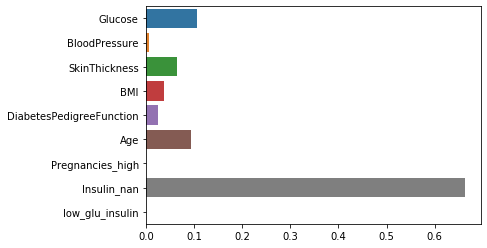

In [48]:
sns.barplot(x = model.feature_importances_, y = feature_names)

In [49]:
# 예측을 하고 결과를 y_predict에 담습니다.

y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 0], dtype=int64)

# 정확도(Accuracy) 측정하기

In [50]:
# 다르게 예측한 갯수를 구해서 diff_count 에 할당해 줍니다.
# DecisionTree : 28
# RandomForest : 20
# GradientBoosting : 24

(y_predict != y_test).sum()

24

In [51]:
# accuracy score 를 구합니다.
# DecisionTree : 0.818
# RandomForest : 0.870
# GradientBoosting : 0.844

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.8441558441558441